In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_dir = '/home/blqrf/code/blarflelsouf/Projet/Data/Training'
test_dir = '/home/blqrf/code/blarflelsouf/Projet/Data/Testing'

In [4]:
folders = os.listdir(train_dir)
images_paths =[]
labels = []
folders

['meningioma', 'pituitary', 'glioma', 'notumor']

In [5]:
# Path of each image in each folder
for folder in folders:
    folder_path = os.path.join(train_dir, folder)
    list_image = os.listdir(folder_path)
    for image in list_image :
        image_path = os.path.join(folder_path, image)
        images_paths.append(image_path)
        labels.append(folder)

In [6]:
#Df train with path and labels

img_path = pd.Series(images_paths, name='images_paths')
label = pd.Series(labels, name='labels')

df_train = pd.concat([img_path, label], axis=1)
df_train

,images_paths,labels
0,/home/blqrf/code/blarflelsouf/Projet/Data/Trai...,meningioma
1,/home/blqrf/code/blarflelsouf/Projet/Data/Trai...,meningioma
2,/home/blqrf/code/blarflelsouf/Projet/Data/Trai...,meningioma
3,/home/blqrf/code/blarflelsouf/Projet/Data/Trai...,meningioma
4,/home/blqrf/code/blarflelsouf/Projet/Data/Trai...,meningioma
...,...,...
5707,/home/blqrf/code/blarflelsouf/Projet/Data/Trai...,notumor
5708,/home/blqrf/code/blarflelsouf/Projet/Data/Trai...,notumor
5709,/home/blqrf/code/blarflelsouf/Projet/Data/Trai...,notumor
5710,/home/blqrf/code/blarflelsouf/Projet/Data/Trai...,notumor


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-03-10 15:45:08.204082: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-10 15:45:08.411993: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-10 15:45:08.466451: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-03-10 15:45:08.466470: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not ha

In [8]:
batch_size = 16
img_size = (224, 224)

gen = ImageDataGenerator()

train_gen = gen.flow_from_dataframe(
    df_train,
    x_col= 'images_paths',
    y_col= 'labels', target_size= img_size,
    class_mode= 'categorical',
    color_mode= 'rgb',
    shuffle = True,
    batch_size= batch_size
)

Found 5712 validated image filenames belonging to 4 classes.


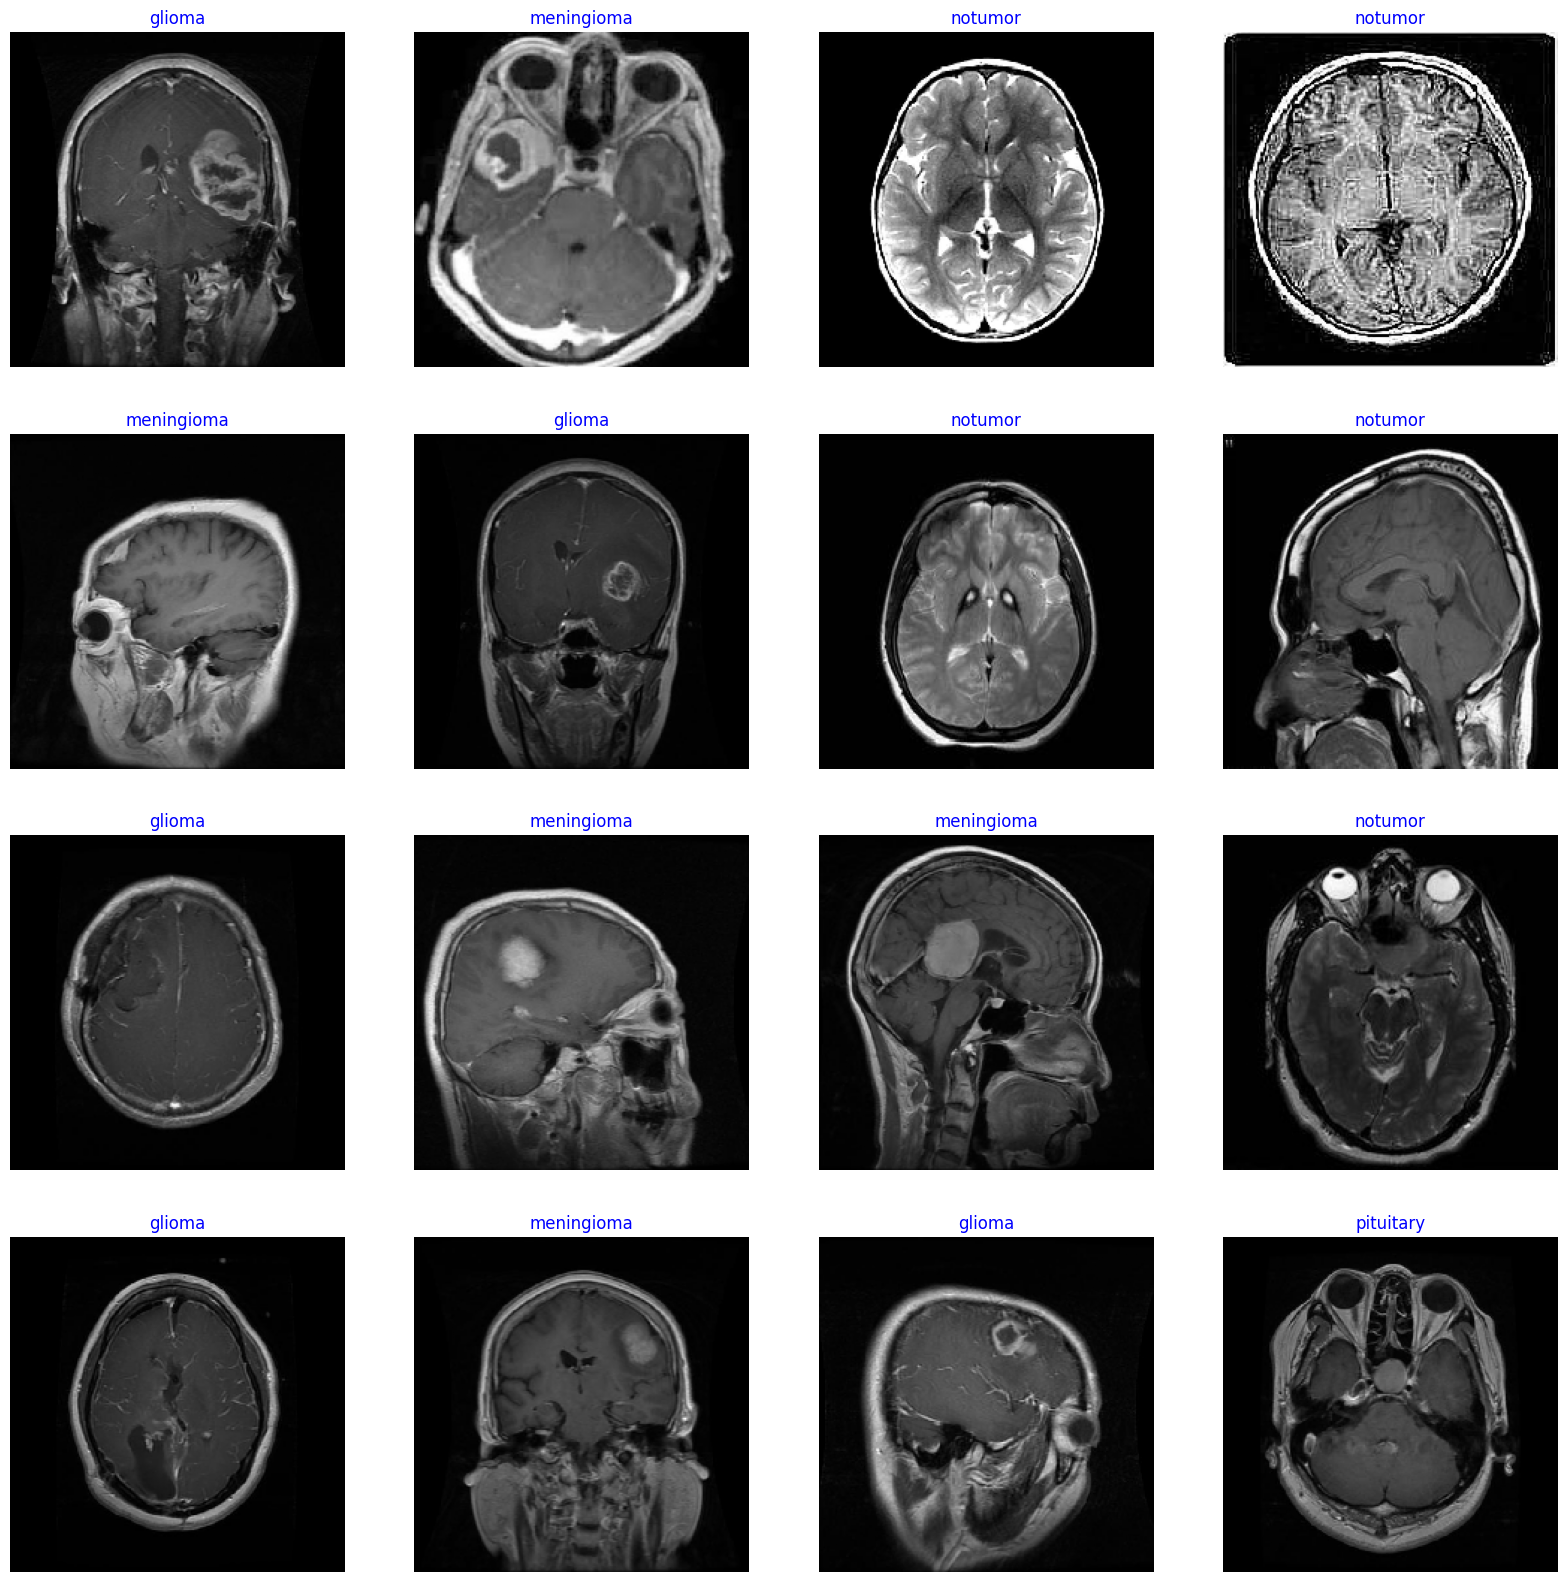

In [9]:
g_dict = train_gen.class_indices
classes = list(g_dict.keys())
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

In [10]:
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
train_df , valid_df = train_test_split(train_gen, train_size=0.7, shuffle=True, random_state=123)

In [20]:
train_df[0][0].shape

(16, 224, 224, 3)

In [11]:
model = models.Sequential()

model.add(layers.Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(225, 225, 3)))
model.add(layers.Conv2D(4, kernel_size=(3), activation='relu')) # kernel_size = 3 <==> (3, 3)
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 6)       168       
                                                                 
 conv2d_1 (Conv2D)           (None, 221, 221, 4)       220       
                                                                 
 flatten (Flatten)           (None, 195364)            0         
                                                                 
 dense (Dense)               (None, 1)                 195365    
                                                                 
Total params: 195,753
Trainable params: 195,753
Non-trainable params: 0
_________________________________________________________________


2025-03-10 15:57:04.289322: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-03-10 15:57:04.289680: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2025-03-10 15:57:04.289781: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Legram): /proc/driver/nvidia/version does not exist
2025-03-10 15:57:04.291792: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['recall'])